# CSYE 7230: Assignment 1

Submitted by: Rishabh Kaushick

# 1. Environment Setup (5%)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Installing Libraries

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Loading The Dataset

In [3]:
# Loading Fashion MNIST dataset
fashion_mnist_train = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('./data/fashion-mnist_test.csv')

## Libraries Used & Their Versions

The following libraries have been used in this virtual environment:

In [4]:
# libraires & thier versions
!pip freeze

absl-py==2.0.0
aiofiles==23.2.1
aiohttp==3.9.3
aiosignal==1.3.1
altair==5.3.0
annotated-types==0.6.0
anyio==4.0.0
appnope==0.1.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
async-timeout==4.0.3
attrs==23.2.0
Babel==2.14.0
backcall==0.2.0
bayesian-optimization==1.4.3
beautifulsoup4==4.12.3
bleach==6.1.0
blis==0.7.11
cachetools==5.3.2
catalogue==2.0.10
category-encoders==2.6.3
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpathlib==0.16.0
cmdstanpy==1.2.5
colorama==0.4.6
comm==0.2.1
confection==0.1.4
contourpy==1.1.1
cramjam==2.8.1
cycler==0.12.1
cymem==2.0.8
dataclasses-json==0.6.4
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
distro==1.9.0
dnspython==2.6.1
en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl#sha256=86cc141f63942d4b2c5fcee06630fd6f904788d2f0ab005cce45aadb8fb73889
et-xmlfile==1.1.0
excepti

All of this code was executed on the 

# 2. Dataset Exploration (5%)

## Data Characteristics

In [5]:
# number of instances
print("Number of instances in Train:")
fashion_mnist_train.info()

print("\nNumber of instances in Test:")
fashion_mnist_test.info()

Number of instances in Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB

Number of instances in Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# understanding the labels
fashion_mnist_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Based on the information provided in the data description, the label numbers correspond to the following clothing items:
<table>
  <tr>
    <th>Label</th>
    <th>Clothing</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/ Top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [8]:
fashion_mnist_train.min()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
fashion_mnist_train.max()

label         9
pixel1       16
pixel2       36
pixel3      226
pixel4      164
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 785, dtype: int64

From the above cells we can see that the pixel value of the image range from 0 to 255.

### Class Distribution

In [10]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/ Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(fashion_mnist_train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/ Top        :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_25147/1772011397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=data, x='label',


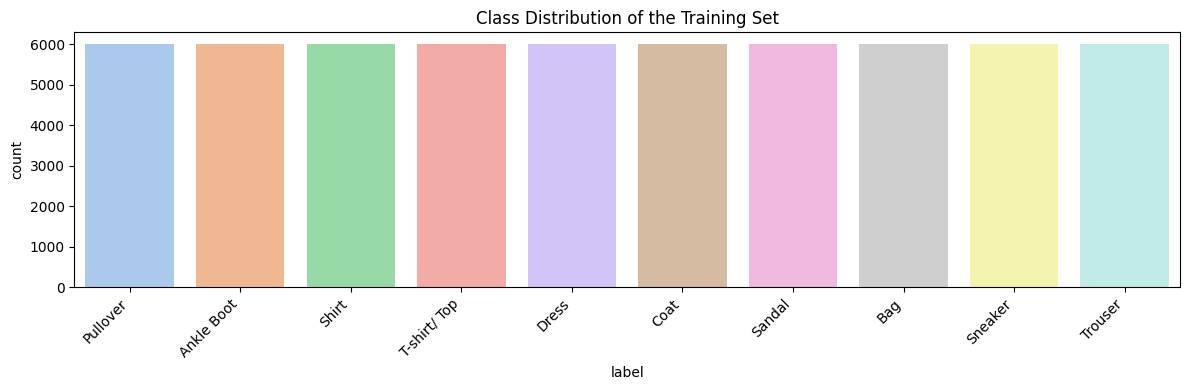

In [11]:
def plot_label_per_class(data, title):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    # Use palette='Set2' for different colors, and map labels to their names for x-axis
    g = sns.countplot(data=data, x='label', 
                     order=data["label"].value_counts().index,
                     palette='pastel')
    g.set_title("Class Distribution of the "+title)
    
    # Replace x-axis numeric labels with clothing names
    plt.xticks(range(len(labels)), [labels[i] for i in data["label"].value_counts().index], rotation=45, ha='right')
    
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

plot_label_per_class(fashion_mnist_train, 'Training Set')

/var/folders/3m/tt_kbz7d2tx3f5cx3v4nd4940000gn/T/ipykernel_25147/1772011397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=data, x='label',


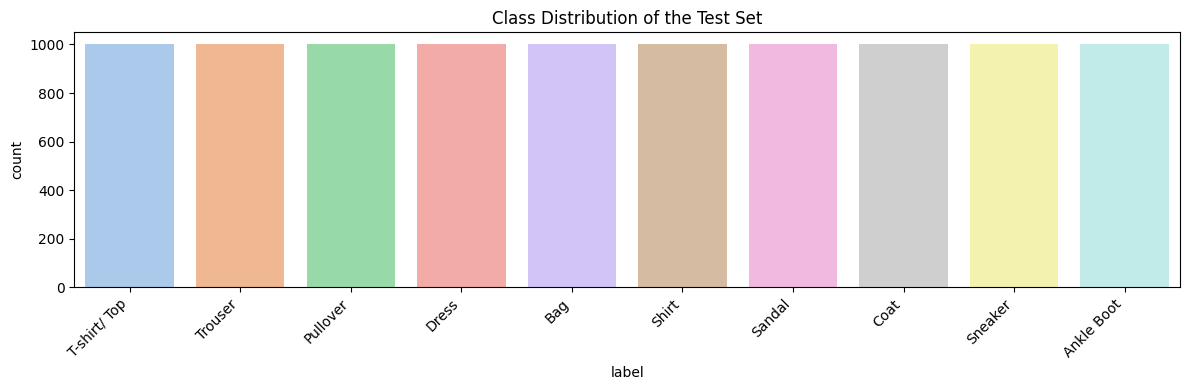

In [12]:
plot_label_per_class(fashion_mnist_test, 'Test Set')

## Data Preprocessing

In [13]:
# converting the data frame to numpy array for easy manipulation
train_np_array = np.array(fashion_mnist_train, dtype = 'float32')
test_np_array = np.array(fashion_mnist_test, dtype = 'float32')

### Normalizing Data

Below are two preprocessing steps:
1. Split the attributes (x) and the label (y)
2. Normalize the pixel values (instead of 0 to 255 --> 0 to 1)

In [14]:
# spliting x train and y train & normalizing x train
x_train = train_np_array[:,1:]/255
y_train = train_np_array[:,0]

# spliting x test and y test & normalizing x test
x_test= test_np_array[:,1:]/255
y_test=test_np_array[:,0]

### Train & Validation Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=2315)
print(f'Number of rows in x_train --> {len(x_train)} & in the x_validate --> {len(x_validate)}')

Number of rows in x_train --> 48000 & in the x_validate --> 12000


## Visualizing Sample Images

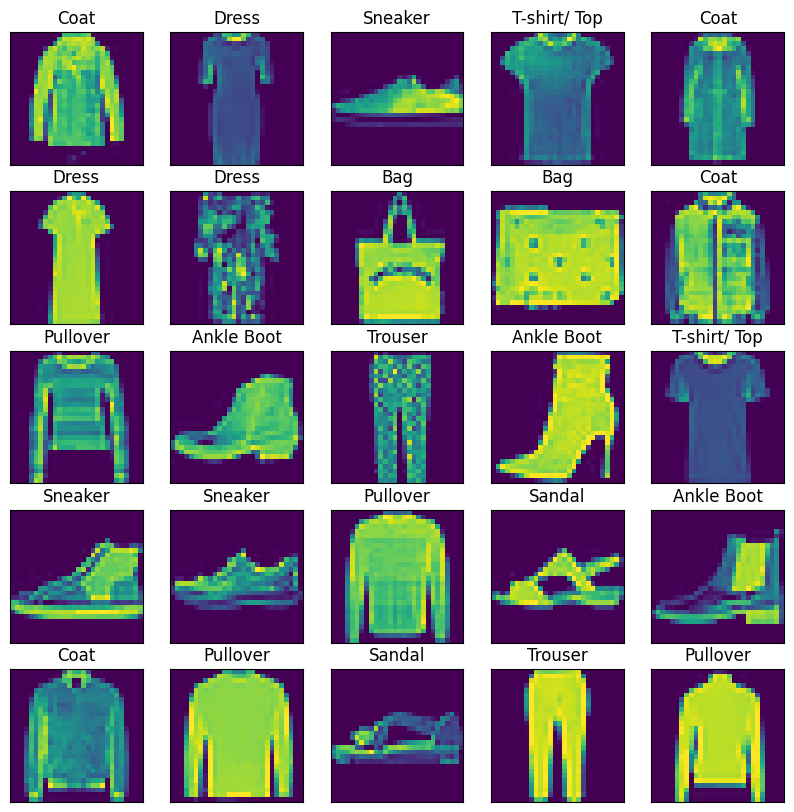

In [17]:
class_names = ['T-shirt/ Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(10, 10))
# plotting the first 25 images with 5x5 subplots
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # no need for any x or y labels (ticks)
    plt.xticks([])
    plt.yticks([])
    # no need for a grid
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    # getting the label number
    label_index = int(y_train[i])
    # displaying the corresponding clothing class name
    plt.title(class_names[label_index])
plt.show()

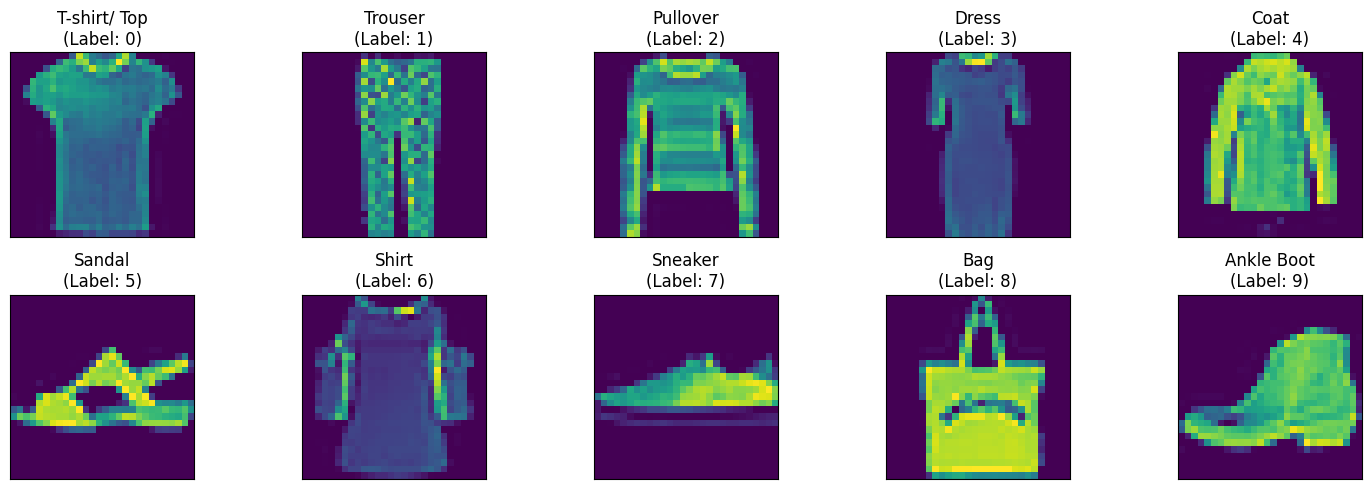

In [18]:
plt.figure(figsize=(15, 5))

# Creating a dict to keep track of the labels we've seen
seen_labels = {}

# Looping through the dataset until we find one example of each label
for i in range(len(x_train)):
    label = int(y_train[i])
    # if it is not present, let's add it to the dictionary
    if label not in seen_labels and len(seen_labels) < 10:
        seen_labels[label] = i
    # if all 10 labels are found, break out
    if len(seen_labels) == 10:
        break

# Plotting one image from each class
for idx, (label, image_idx) in enumerate(sorted(seen_labels.items())):
    plt.subplot(2, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image_idx].reshape((28,28)))
    plt.title(f'{class_names[label]}\n(Label: {label})')

plt.tight_layout()
plt.show()

# 3. Basic CNN Model Design and Training (25%)

- Build a basic CNN model with:
  - A convolutional layer followed by max-pooling.
  - Additional convolutional layers as needed.
  - A fully connected (dense) layer and an output layer with 10 units (softmax activation).
- Use ReLU activation for hidden layers.
- Compile the model with a suitable loss function (e.g., categorical crossentropy) and optimizer (e.g., Adam or SGD).
- Train the model for at least 10 epochs, tracking training/validation accuracy and loss.

## Data Preprocessing For CNN Model

Let's see the shape of our train, validate and test:

In [19]:
x_train.shape

(48000, 784)

In [20]:
x_validate.shape

(12000, 784)

In [21]:
x_test.shape

(10000, 784)

From the above we can see that the original shape of the x_train is (48000, 784) & x_validate is (12000, 784).

CNN models require input data to be in the following dimension:

_Image Shape =(number of samples, m, n, number of color channels)_

Where:
- _m, n_ – represent the image in a _m_*_n_ matrix.
In our case _m_ and _n_ are both 28 (since we have 28 * 28 pixels)
- _number of color channels_ – in our case we have only 1 color channel. Sometimes images have 3 color channels, red, green and blue, for each pixel. In such cases this value will be three.


In [22]:
image_shape = (28, 28, 1)

In [23]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [24]:
print(f'x train shape: {x_train.shape}')
print(f'x validate shape: {x_validate.shape}')
print(f'x test shape: {x_test.shape}')

x train shape: (48000, 28, 28, 1)
x validate shape: (12000, 28, 28, 1)
x test shape: (10000, 28, 28, 1)


## Baseline CNN

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [26]:

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output: instead of 28*28 now it get divided by 2 --> 14*14
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'), # fully connected dense layer
    Dense(10,activation = 'softmax') # output layer to make the prediction
])

### Compiling Baseline CNN

In [27]:
cnn_model.compile(
    loss ='sparse_categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.001),
    metrics =['accuracy']
)

### Training Baseline CNN

In [28]:
baseline_cnn_history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/50
12/12 [==============================] - 3s 253ms/step - loss: 1.7693 - accuracy: 0.4160 - val_loss: 1.2130 - val_accuracy: 0.5852
Epoch 2/50
12/12 [==============================] - 2s 192ms/step - loss: 0.9721 - accuracy: 0.6850 - val_loss: 0.7462 - val_accuracy: 0.7517
Epoch 3/50
12/12 [==============================] - 2s 196ms/step - loss: 0.6865 - accuracy: 0.7676 - val_loss: 0.6050 - val_accuracy: 0.7916
Epoch 4/50
12/12 [==============================] - 2s 183ms/step - loss: 0.5873 - accuracy: 0.7964 - val_loss: 0.5374 - val_accuracy: 0.8116
Epoch 5/50
12/12 [==============================] - 2s 184ms/step - loss: 0.5313 - accuracy: 0.8174 - val_loss: 0.5128 - val_accuracy: 0.8127
Epoch 6/50
12/12 [==============================] - 2s 183ms/step - loss: 0.5016 - accuracy: 0.8254 - val_loss: 0.4761 - val_accuracy: 0.8327
Epoch 7/50
12/12 [==============================] - 2s 191ms/step - loss: 0.4712 - accuracy: 0.8383 - val_loss: 0.4488 - val_accuracy: 0.8452
Epoch 

### Training Accuracy & Loss Graph

In [29]:
baseline_cnn_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Baseline CNN: Accuracy')

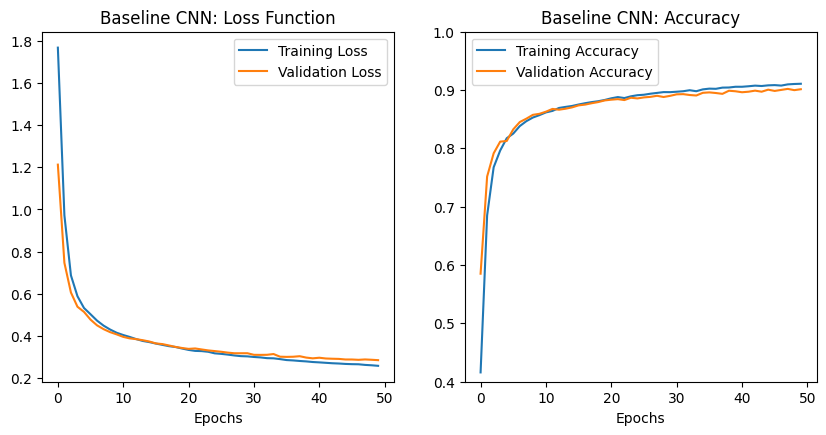

In [30]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(baseline_cnn_history.history['loss'], label='Training Loss')
plt.plot(baseline_cnn_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Baseline CNN: Loss Function')

plt.subplot(2, 2, 2)
plt.plot(baseline_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylim(0.4,1)
plt.title('Baseline CNN: Accuracy')

### Evaluating The Training & Validation Accuracy

In [31]:
baseline_cnn_training_score = cnn_model.evaluate(x_train, y_train)
baseline_cnn_validation_score = cnn_model.evaluate(x_validate, y_validate)

375/375 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.9014


In [32]:
print("Baseline CNN Model Loss & Accuracy")
print('\nTraining Accuracy: {:.4f}%'.format(baseline_cnn_training_score[1]))
print('Training Loss: {:.4f}'.format(baseline_cnn_training_score[0]))
print('\nValidation Accuracy: {:.4f}%'.format(baseline_cnn_validation_score[1]))
print('Validation Loss: {:.4f}'.format(baseline_cnn_validation_score[0]))

Baseline CNN Model Loss & Accuracy

Training Accuracy: 0.9104%
Training Loss: 0.2584

Validation Accuracy: 0.9014%
Validation Loss: 0.2834


### Evaluating the Test Data

In [33]:
# Get the predictions for the test data
baseline_cnn_test_score = cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.9021


In [34]:
print("Baseline CNN Model Loss & Accuracy")
print('\nTesting Accuracy: {:.4f}%'.format(baseline_cnn_test_score[1]))
print('Testing Loss: {:.4f}'.format(baseline_cnn_test_score[0]))

Baseline CNN Model Loss & Accuracy

Testing Accuracy: 0.9021%
Testing Loss: 0.2843


### Classification Report
Let us explore how our baseline CNN model has performed on all the output labels

In [35]:
y_pred = cnn_model.predict(x_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[9.6152371e-01, 1.5174462e-07, 7.4351043e-04, ..., 2.0506699e-11,
        1.1388197e-03, 6.9602254e-12],
       [1.5336374e-05, 9.9985898e-01, 1.4235376e-07, ..., 7.0598435e-06,
        1.6698398e-06, 1.3500552e-07],
       [3.7286270e-02, 7.4196737e-06, 6.3558722e-01, ..., 7.0114299e-07,
        1.2576030e-05, 1.6286469e-05],
       ...,
       [4.9612821e-09, 5.9996463e-10, 1.1582672e-06, ..., 2.3194600e-08,
        9.9998415e-01, 5.0721396e-09],
       [2.1574723e-03, 1.3061467e-06, 1.0702092e-04, ..., 3.2959271e-09,
        9.5480043e-01, 4.8185598e-07],
       [4.3479307e-03, 9.2310220e-01, 4.7963681e-03, ..., 5.2983637e-08,
        6.0060382e-04, 8.5281920e-07]], dtype=float32)

In [36]:
y_pred[0]

array([9.6152371e-01, 1.5174462e-07, 7.4351043e-04, 2.4552699e-03,
       2.7851796e-05, 1.6934007e-12, 3.4110796e-02, 2.0506699e-11,
       1.1388197e-03, 6.9602254e-12], dtype=float32)

The above shows that our baseline CNN model is giving out probabilities for each of the 10 labels. We must find out which one is the highest probability to assign that specific label.  

In [37]:
# Convert probabilities to class labels by taking argmax
y_pred_classes = np.argmax(y_pred, axis=1)

In [38]:
y_pred_classes

array([0, 1, 2, ..., 8, 8, 1])

In [39]:
from sklearn.metrics import classification_report
print('CNN Baseline Model: Classification Report on Test Data:')
print(classification_report(y_true=y_test, y_pred=y_pred_classes, target_names=class_names))

CNN Baseline Model: Classification Report on Test Data:
              precision    recall  f1-score   support

T-shirt/ Top       0.81      0.89      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.78      0.65      0.71      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle Boot       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# 4. Experimentation with Architectures (30%)

- Modify the CNN architecture to include:
  - Different numbers of convolutional layers or filters.
  - Use of dropout layers for regularization.
  - Batch normalization layers for improved training stability.
- Train each variation and document the impact on performance.

# 5. Model Evaluation and Comparison (20%)

# 6. Analysis and Insights (10%)